# Perceptron Multilingue

### Import des fonctions du fichiers utils

In [1]:
# import des fonctions du fichiers utils
%matplotlib widget 
from utils import *

2024-02-15 12:48:59.818945: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-15 12:48:59.855717: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-15 12:48:59.855751: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-15 12:48:59.856783: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-15 12:48:59.862727: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-15 12:48:59.863358: I tensorflow/core/platform/cpu_feature_guard.cc:1

### Charger et diviser les données
#### Avec ou sans normalisation

In [2]:
# keras text vectoriser 
data = load_data(normalise=True) # normalise=True or False(by default)
print(f'data length : {len(data)}') # del


data length : 96125


In [ ]:
#### Keras Text Vectoriser


In [2]:
# valider avant et après normalisation
# data = load_data(normalise=True) # normalise=True or False(by default)
# print(f'data length : {len(data)}') # del

train, valid, test = split_dataset(data)
len(train), len(valid), len(test)

data length : 96125


(77860, 8652, 9613)

#### Définir la taille des jeu de données 

In [3]:
train_length = 1000 #77860
valid_length = 100 #8652
test_length = 100 #9613


#### Transformation en tensors (pour l'entraînement)

In [4]:
X_tr, Y_tr = dataset_to_tensors(train[:train_length])

/home/shamglam/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [5]:
print(X_tr.shape, Y_tr.shape)

(1000, 6) (1000, 6)


### Creation de modèle


In [6]:
# m = PerceptronModel1()
m = PerceptronModel2()
# m.set_weights([np.array([[-0.09],[0.09]])]) # change to 6 weights 
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 16)                │        112 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ layer2 (Dense)                  │ (None, 8)                 │        136 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 6)                 │         54 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 302 (1.18 KB)

 Trainable params: 302 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# test data to tensors
X_test , y_test = dataset_to_tensors(test[:test_length])
print(f'len test data: {X_test.shape}, {y_test.shape}')

X_val, y_val = dataset_to_tensors(valid[:valid_length])



len test data: (100, 6), (100, 6)


/home/shamglam/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/shamglam/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### Model Fit

In [8]:
# calculate loss and accuracy
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
    patience=5, verbose=1, mode='auto', restore_best_weights=True)

m.fit(x=X_tr, y=Y_tr, epochs=15, batch_size=4, validation_data=(X_val, y_val), callbacks=[monitor], verbose=2 )


Epoch 1/15
250/250 - 1s - 5ms/step - accuracy: 0.2060 - loss: 1.7422 - val_accuracy: 0.2500 - val_loss: 1.6916
Epoch 2/15
250/250 - 0s - 907us/step - accuracy: 0.3650 - loss: 1.6403 - val_accuracy: 0.4400 - val_loss: 1.5905
Epoch 3/15
250/250 - 0s - 856us/step - accuracy: 0.5030 - loss: 1.5295 - val_accuracy: 0.5200 - val_loss: 1.4722
Epoch 4/15
250/250 - 0s - 954us/step - accuracy: 0.5150 - loss: 1.4090 - val_accuracy: 0.5800 - val_loss: 1.3557
Epoch 5/15
250/250 - 0s - 907us/step - accuracy: 0.5260 - loss: 1.2962 - val_accuracy: 0.5900 - val_loss: 1.2527
Epoch 6/15
250/250 - 0s - 879us/step - accuracy: 0.5590 - loss: 1.2022 - val_accuracy: 0.5900 - val_loss: 1.1708
Epoch 7/15
250/250 - 0s - 893us/step - accuracy: 0.5670 - loss: 1.1283 - val_accuracy: 0.5700 - val_loss: 1.1087
Epoch 8/15
250/250 - 0s - 898us/step - accuracy: 0.5870 - loss: 1.0702 - val_accuracy: 0.5900 - val_loss: 1.0643
Epoch 9/15
250/250 - 0s - 935us/step - accuracy: 0.5890 - loss: 1.0271 - val_accuracy: 0.6200 - va

In [9]:
# Evaluation du modèle
score = m.evaluate(X_test, y_test, verbose=0) # score = test_loss, test_accuracy
print(f'{score[0]}  |  {score[1]} ')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

0.9011863470077515  |  0.6399999856948853 
Test loss: 0.9011863470077515
Test accuracy: 0.6399999856948853


### Hinge Loss

In [10]:
y_pred_val = m.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [11]:
# # Hinge Loss Categorical 

# h = tf.keras.losses.CategoricalHinge(
#     reduction="sum_over_batch_size", name="categorical_hinge")

# neg=max((1-y_test)*y_pred_val) 
# pos=sum(y_test*y_pred_val)


In [12]:



# print(y_test.shape, y_test.shape)
max_index = np.argmax(y_pred_val, axis=1)
# print(y_test[:10], y_pred[:10])
y_pred = np.zeros_like(y_pred_val)
y_pred[np.arange(len(y_pred_val)), max_index] = 1

# y_pred

#### Confusion Matrix

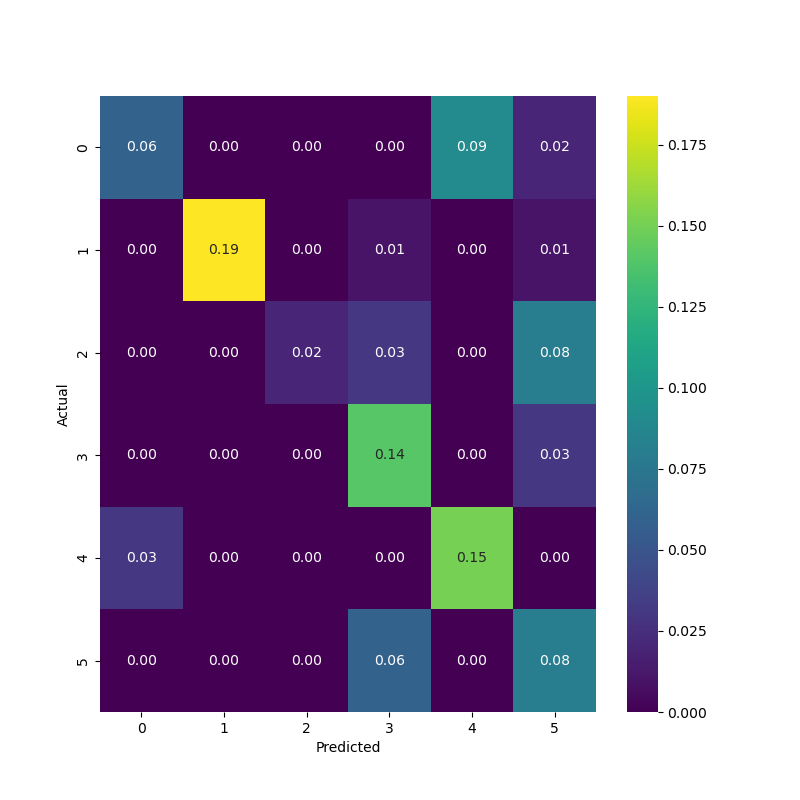

In [13]:
draw_confusion_matrix(y_test, y_pred)

#### Calcul mse avec les prédictions
error calculations
    - https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_04_3_regression.ipynb

In [14]:
# Mean squared error with 
from sklearn import metrics
# Measure MSE error.  
score = metrics.mean_squared_error(y_pred,y_test)
print("Final score (MSE): {}".format(score))

Final score (MSE): 0.12


In [15]:
# loss = maximum(1 - y_true * y_pred, 0)

### Essai avec fichier multilingue 

--------------------------------

#### Avec tout le jeu de données train, test, valid (77860, 8652, 9613):

#### Avec bigrammes `en th es`

Test loss: 0.9385170340538025\
Test accuracy: 0.6062623262405396

#### Avec 4 bigrammes `en th le es`
Test loss
Final score (MSE): 0.11245188806824091

#### Avec 6 bigrammes `en th le es be co`


Nous observons un progrès significatif avec une augmentation des paramètres , ex. nombre de bigrammes 


| Nombre de bigrammes | bigrammes choisis | Loss | Accuracy| MSE
|:--------:|:--------:|:--------:|:--------:|:--------:|
| 3 | en th es | 0.9385170340538025 | 0.6062623262405396 | (oublié de noter)
| 4 | es th le es | 0.8471202850341797 | 0.6626443266868591 | 0.11245188806824091
| 6 | es th es le be co | 0.6632034182548523  |  0.7276604771614075 | 0.09077984673532369

( MSE 0.09077984673532369 pour 6 bigrammes)

- utilisation de keras sequential
- globalement meilleures résultats avec Adam que avec sgd
- l'augmentation de nombres de bigrammes donne de meilleurs scores
- C'est seulement à partir de 6 bigrammes que nous commençons à avoir des résultats à peu près fiables

#### Activation
Pour une categorisation multi-class, il nous faut des activations `sigmoid` et l'avant dernière couche `softmax`.

#### Loss 
Pour deux langues nous avons utilisé `binary_crossentropy` alors qu'avec le fichier contenant six langues nous utilisons `categorical_crossentropy`. 



### Question pour le cours :
``Est-ce qu'on split les données avant ou après la normalisation ?``


P.S. J'ai fait plusieurs essais avec des paramètres et des epoch différents. \
Malheureusement je n'ai pas eu le temps de tout noter. 


-----------------------------------------------------------------------------------------------

### Corrections
- should compute all parameters when notebook is run
- ex. with 3 , 4 , 6 bigrammes
- build_encoders -> sparse_categorical_crossentropy
- 100 bigrammes les plus fréquents
  

### Devoirs
Regarder video :
- noter questions 
- translate Pytorch to Keras
- keras.layers.TextVectorization(...
- 

    